In [20]:
from reservoir_rls import *
import matplotlib.pyplot as plt
from lorenz63 import *
from scipy.signal import welch

In [2]:
x = double_reservoir(3,300,input_weight = [.1,.2])

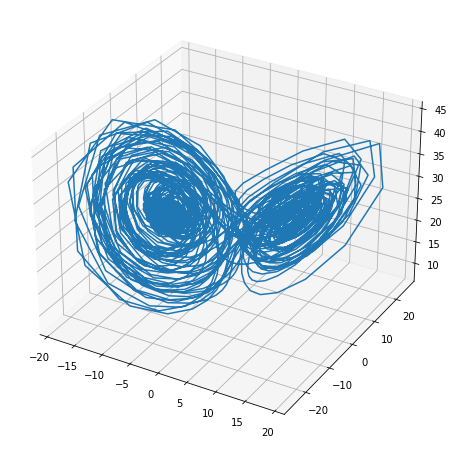

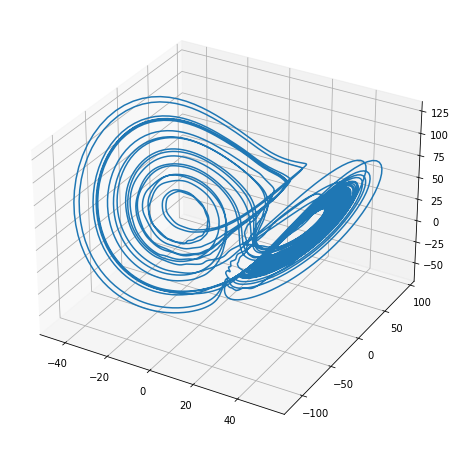

In [33]:
data_length = 100000
step = 0.05
f_s = 1/step
S = 1
C = 0.5
Cz = 0.5
O = -11
scale = 0.05
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_lorenz_2scale(x, time, r_t, C1 = C, C2 = C, C1star = Cz, C2star = Cz, S = S, O = O, scale = scale)
lorenz_data_coupled = getCoupledLorenzData(data_length, r_t, dx_dt, sample_tau = step)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data_coupled[:10000,0],lorenz_data_coupled[:10000,1],lorenz_data_coupled[:10000,2])
plt.show()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data_coupled[:10000,3],lorenz_data_coupled[:10000,4],lorenz_data_coupled[:10000,5])
plt.show()

(10001,)
(10001,)


(0.0, 100.0)

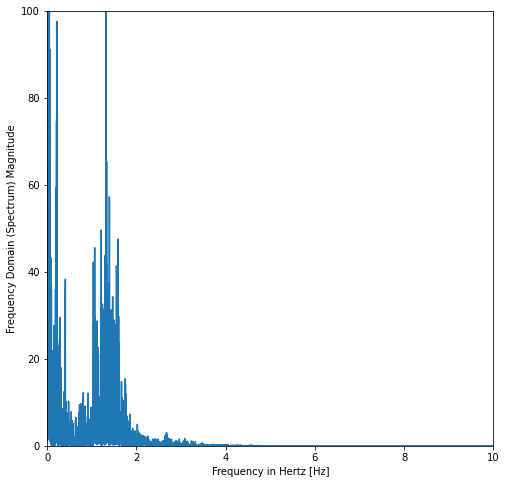

In [35]:
var = 2
nperseg = 20000

f_s = 1/step
freqs, X = welch(lorenz_data_coupled[:,var], f_s, nperseg = nperseg, scaling = 'density')
print(X.shape)
print(freqs.shape)
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 10)
ax.set_ylim(0, 100)

In [ ]:
Wn_xy = 0.195
Wn_z = Wn_xy
lorenz_data_split = separate_lorenz_2scale(lorenz_data_coupled[:,:3], f_s, Wn_xy, Wn_z, filter_order = 10)
print(np.mean(lorenz_data_split, axis = 0))
print(np.std(lorenz_data_split, axis = 0))

In [ ]:
data_length = 100000
step = 0.05
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_lorenz(x, time, r_t)
lorenz_data_base = getLorenzData(data_length, r_t, dx_dt, sample_tau = step)

In [ ]:
print(np.mean(lorenz_data_base, axis = 0))
print(np.std(lorenz_data_base, axis = 0))

In [37]:
res_base = reservoir(3, 1000, input_weight = 0.017, regularization = 1e-7, forget = 1)
train_length = 2000
sync_length = 500
pred_length = 500
num_tests = 50
results = cross_validation_performance_resync(lorenz_data_coupled[:,:3], res_base, num_tests, sync_length, train_length, pred_length, \
         seed = 5, errormax = 3.2, train_method = 'Normal', progress = True, plot = False)
print(results)
print(np.mean(results))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:08<00:00,  5.62it/s]

[454. 500. 475. 500.  52. 125. 243. 500.   6. 500. 500. 169. 498. 189.
  67. 500. 118. 394. 500. 500. 500.  23. 183. 449. 321. 500. 500. 392.
 500. 500.  46. 500. 500. 170. 500. 500. 500. 500. 162. 437. 500.  94.
 500. 500. 500. 138. 500.  31. 150. 500.]
357.72


In [ ]:
d_res = double_reservoir(6, 1000, input_weight = [0.017,0.017], regularization = [1e-7,1e-7], forget = [1,1])
train_length = 1000
sync_length = 500
pred_length = 500
num_tests = 50
results = cross_validation_performance_resync_split(lorenz_data_split, d_res, num_tests, sync_length, train_length, pred_length, \
         seed = 5, errormax = 3.2, train_method = 'Normal', progress = True)

In [ ]:
print(results)
print(np.mean(results))